In [1]:
# =============================================================================
# Title   : Fuzzy Logic Portfolio — Education & Social Sciences (3 Examples)
# Course  : Models and Methods of Intelligent Systems
# Topic   : Student Performance, Support Need, Scholarship Recommendation
# Author  : Dr.-Ing. Cesar Hernando Valencia Niño
# Date    : 2026-01-27
# =============================================================================

# =========================
# Install & Imports
# =========================
!pip -q install scikit-fuzzy ipywidgets
import numpy as np, matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from ipywidgets import interact, FloatSlider, HTML
from IPython.display import display
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass
print("Setup complete.")

# =========================
# Helper Utilities
# =========================
def plot_mfs(variable, title_suffix=""):
    plt.figure()
    for term_name, term_obj in variable.terms.items():
        plt.plot(variable.universe, term_obj.mf, label=term_name)
    plt.title(f"Membership Functions — {variable.label} {title_suffix}".strip())
    plt.xlabel(variable.label); plt.ylabel("Membership degree")
    plt.ylim(-0.05, 1.05); plt.grid(True, alpha=0.3); plt.legend(); plt.show()

def report_system(title, antecedents, consequents, rules):
    print("\n" + "="*80); print(title); print("="*80)
    def _describe(v):
        u = v.universe
        print(f"\nVariable: {v.label}")
        print(f"  Universe: [{float(u.min()):.4f}, {float(u.max()):.4f}] | Points: {len(u)}")
        print("  Fuzzy sets (terms):")
        for t in v.terms.keys(): print(f"    - {t}")
    print("\n--- Antecedents (Inputs) ---")
    for a in antecedents: _describe(a)
    print("\n--- Consequents (Outputs) ---")
    for c in consequents: _describe(c)
    print("\n--- Rule Base ---")
    for i, r in enumerate(rules, 1): print(f"{i:02d}. {str(r)}")

def build_dashboard(system, inputs_spec, output_name, title):
    sim = ctrl.ControlSystemSimulation(system)
    sliders = {name: FloatSlider(value=v0, min=vmin, max=vmax, step=step,
                                 description=name, continuous_update=False)
               for (name, vmin, vmax, step, v0) in inputs_spec}
    display(HTML(f"<h3 style='margin:6px 0'>{title}</h3>"))
    def _run(**kwargs):
        for k, v in kwargs.items(): sim.input[k] = float(v)
        sim.compute()
        y = float(sim.output[output_name])
        print(f"{output_name} (defuzzified) = {y:.6f}")
        return y
    interact(_run, **sliders)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
Setup complete.



Example 1 — Student Performance (exam, attendance → final_perf)

--- Antecedents (Inputs) ---

Variable: exam
  Universe: [0.0000, 100.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

Variable: attendance
  Universe: [0.0000, 100.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

--- Consequents (Outputs) ---

Variable: final_perf
  Universe: [0.0000, 100.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Rule Base ---
01. IF exam[high] AND attendance[high] THEN final_perf[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF exam[mid] AND attendance[high] THEN final_perf[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF exam[high] AND attendance[low] THEN final_perf[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF exam[low] OR attendance[low] THEN final_perf[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax


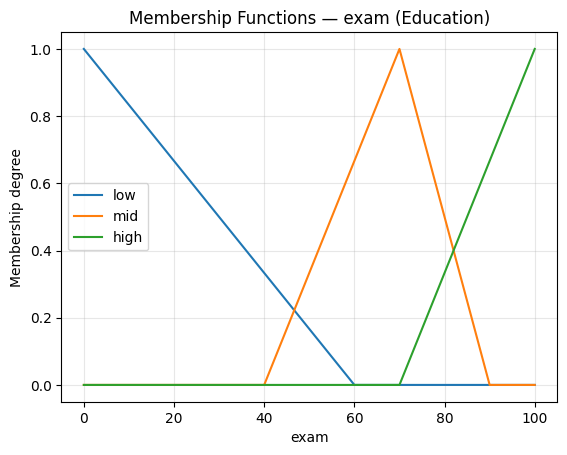

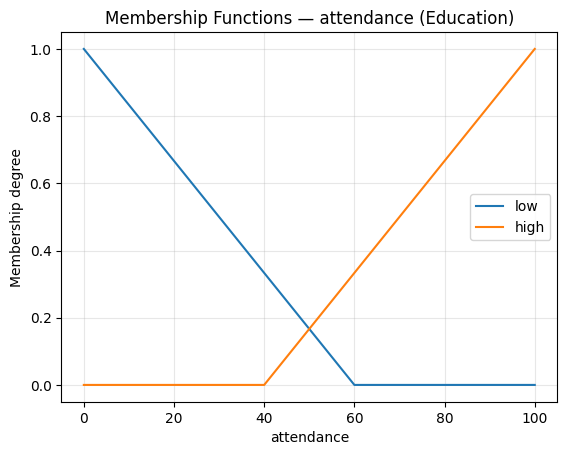

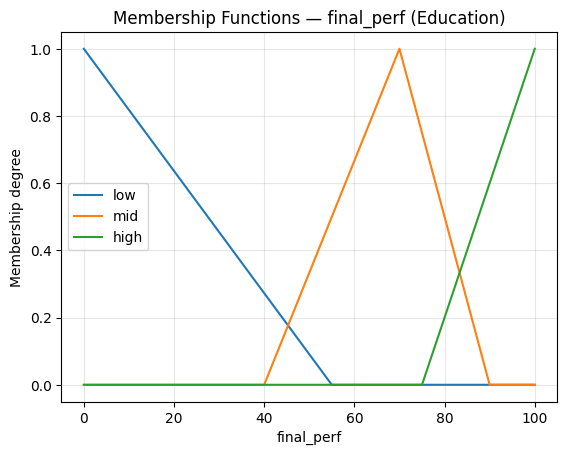

HTML(value="<h3 style='margin:6px 0'>Example 1 — Student Performance Dashboard</h3>")

interactive(children=(FloatSlider(value=78.0, continuous_update=False, description='exam', step=1.0), FloatSli…

In [2]:
# Example 1 — Student Performance
exam = ctrl.Antecedent(np.linspace(0, 100, 201), 'exam')
attendance = ctrl.Antecedent(np.linspace(0, 100, 201), 'attendance')
final_perf = ctrl.Consequent(np.linspace(0, 100, 201), 'final_perf')

exam['low'] = fuzz.trimf(exam.universe, [0, 0, 60])
exam['mid'] = fuzz.trimf(exam.universe, [40, 70, 90])
exam['high'] = fuzz.trimf(exam.universe, [70, 100, 100])

attendance['low'] = fuzz.trimf(attendance.universe, [0, 0, 60])
attendance['high'] = fuzz.trimf(attendance.universe, [40, 100, 100])

final_perf['low'] = fuzz.trimf(final_perf.universe, [0, 0, 55])
final_perf['mid'] = fuzz.trimf(final_perf.universe, [40, 70, 90])
final_perf['high'] = fuzz.trimf(final_perf.universe, [75, 100, 100])

rules = [
    ctrl.Rule(exam['high'] & attendance['high'], final_perf['high']),
    ctrl.Rule(exam['mid'] & attendance['high'], final_perf['mid']),
    ctrl.Rule(exam['high'] & attendance['low'], final_perf['mid']),
    ctrl.Rule(exam['low'] | attendance['low'], final_perf['low']),
]
system = ctrl.ControlSystem(rules)
report_system("Example 1 — Student Performance (exam, attendance → final_perf)",
              [exam, attendance], [final_perf], rules)
plot_mfs(exam, "(Education)"); plot_mfs(attendance, "(Education)"); plot_mfs(final_perf, "(Education)")
build_dashboard(system, [('exam', 0, 100, 1, 78), ('attendance', 0, 100, 1, 65)],
                'final_perf', "Example 1 — Student Performance Dashboard")


Example 2 — Support Need (motivation, difficulty → support)

--- Antecedents (Inputs) ---

Variable: motivation
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

Variable: difficulty
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

--- Consequents (Outputs) ---

Variable: support
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Rule Base ---
01. IF motivation[high] AND difficulty[low] THEN support[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF motivation[high] AND difficulty[high] THEN support[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF motivation[low] AND difficulty[low] THEN support[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF motivation[low] AND difficulty[high] THEN support[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax


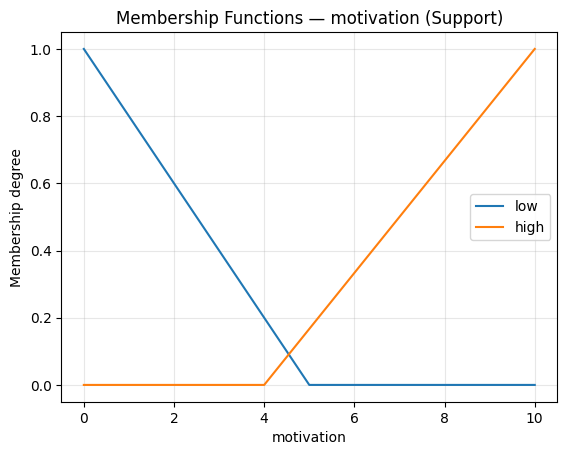

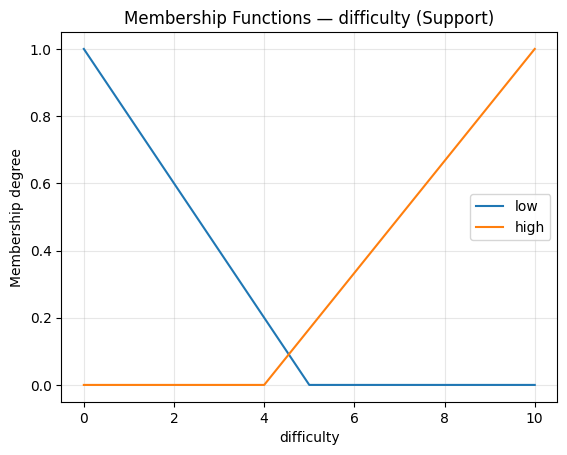

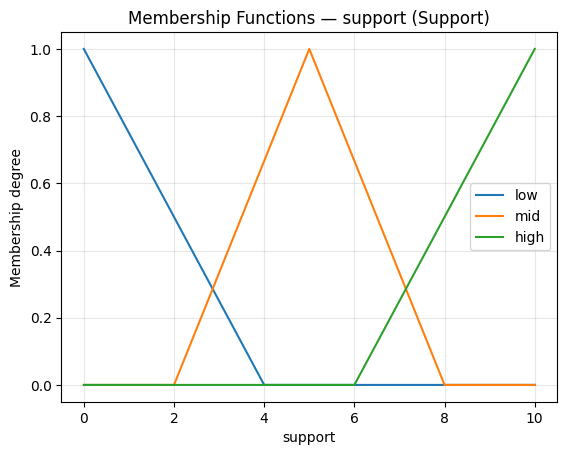

HTML(value="<h3 style='margin:6px 0'>Example 2 — Support Need Dashboard</h3>")

interactive(children=(FloatSlider(value=4.0, continuous_update=False, description='motivation', max=10.0), Flo…

In [3]:
# Example 2 — Support Need
motivation = ctrl.Antecedent(np.linspace(0, 10, 201), 'motivation')
difficulty = ctrl.Antecedent(np.linspace(0, 10, 201), 'difficulty')
support = ctrl.Consequent(np.linspace(0, 10, 201), 'support')

for v in [motivation, difficulty]:
    v['low'] = fuzz.trimf(v.universe, [0, 0, 5])
    v['high'] = fuzz.trimf(v.universe, [4, 10, 10])

support['low'] = fuzz.trimf(support.universe, [0, 0, 4])
support['mid'] = fuzz.trimf(support.universe, [2, 5, 8])
support['high'] = fuzz.trimf(support.universe, [6, 10, 10])

rules = [
    ctrl.Rule(motivation['high'] & difficulty['low'], support['low']),
    ctrl.Rule(motivation['high'] & difficulty['high'], support['mid']),
    ctrl.Rule(motivation['low'] & difficulty['low'], support['mid']),
    ctrl.Rule(motivation['low'] & difficulty['high'], support['high']),
]
system = ctrl.ControlSystem(rules)
report_system("Example 2 — Support Need (motivation, difficulty → support)",
              [motivation, difficulty], [support], rules)
plot_mfs(motivation, "(Support)"); plot_mfs(difficulty, "(Support)"); plot_mfs(support, "(Support)")
build_dashboard(system, [('motivation', 0, 10, 0.1, 4.0), ('difficulty', 0, 10, 0.1, 7.0)],
                'support', "Example 2 — Support Need Dashboard")


Example 3 — Scholarship (merit, need → scholarship)

--- Antecedents (Inputs) ---

Variable: merit
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

Variable: need
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

--- Consequents (Outputs) ---

Variable: scholarship
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Rule Base ---
01. IF merit[high] AND need[high] THEN scholarship[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF merit[high] AND need[low] THEN scholarship[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF merit[low] AND need[high] THEN scholarship[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF merit[low] AND need[low] THEN scholarship[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax


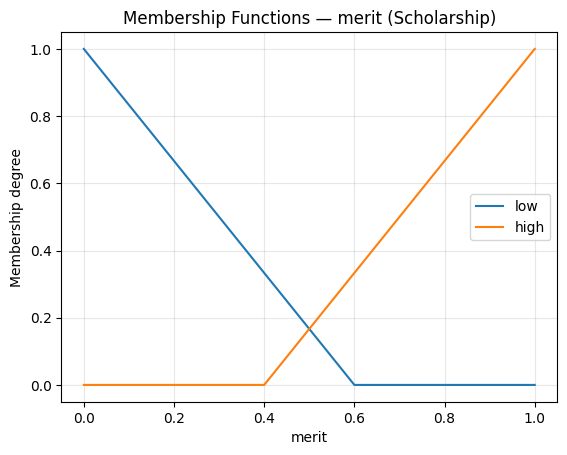

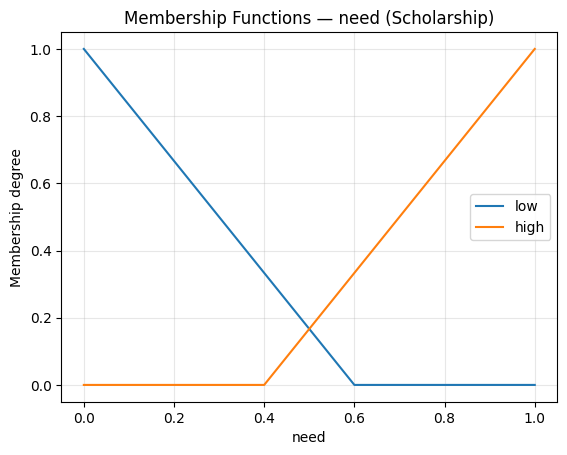

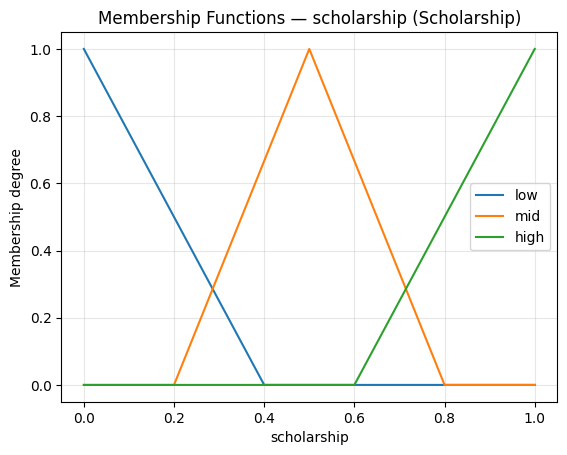

HTML(value="<h3 style='margin:6px 0'>Example 3 — Scholarship Dashboard</h3>")

interactive(children=(FloatSlider(value=0.7, continuous_update=False, description='merit', max=1.0, step=0.01)…

In [4]:
# Example 3 — Scholarship Recommendation
merit = ctrl.Antecedent(np.linspace(0, 1, 201), 'merit')
need = ctrl.Antecedent(np.linspace(0, 1, 201), 'need')
scholarship = ctrl.Consequent(np.linspace(0, 1, 201), 'scholarship')

merit['low'] = fuzz.trimf(merit.universe, [0, 0, 0.6])
merit['high'] = fuzz.trimf(merit.universe, [0.4, 1, 1])

need['low'] = fuzz.trimf(need.universe, [0, 0, 0.6])
need['high'] = fuzz.trimf(need.universe, [0.4, 1, 1])

scholarship['low'] = fuzz.trimf(scholarship.universe, [0, 0, 0.4])
scholarship['mid'] = fuzz.trimf(scholarship.universe, [0.2, 0.5, 0.8])
scholarship['high'] = fuzz.trimf(scholarship.universe, [0.6, 1, 1])

rules = [
    ctrl.Rule(merit['high'] & need['high'], scholarship['high']),
    ctrl.Rule(merit['high'] & need['low'], scholarship['mid']),
    ctrl.Rule(merit['low'] & need['high'], scholarship['mid']),
    ctrl.Rule(merit['low'] & need['low'], scholarship['low']),
]
system = ctrl.ControlSystem(rules)
report_system("Example 3 — Scholarship (merit, need → scholarship)",
              [merit, need], [scholarship], rules)
plot_mfs(merit, "(Scholarship)"); plot_mfs(need, "(Scholarship)"); plot_mfs(scholarship, "(Scholarship)")
build_dashboard(system, [('merit', 0, 1, 0.01, 0.7), ('need', 0, 1, 0.01, 0.8)],
                'scholarship', "Example 3 — Scholarship Dashboard")